In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/regression-dataset/weight-height.csv


In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
import seaborn as sns

In [23]:
df = pd.read_csv("/kaggle/input/regression-dataset/weight-height.csv")

In [24]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [25]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [27]:
df["Gender"].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

In [28]:
df["Height"].value_counts()

Height
65.830726    1
69.868511    1
60.443264    1
60.472262    1
62.056012    1
            ..
69.881796    1
71.730978    1
74.110105    1
68.781904    1
73.847017    1
Name: count, Length: 10000, dtype: int64

In [29]:
df["Weight"].value_counts()

Weight
132.827889    1
177.992066    1
135.559390    1
110.768229    1
125.135897    1
             ..
206.349801    1
220.042470    1
212.740856    1
162.310473    1
241.893563    1
Name: count, Length: 10000, dtype: int64

In [30]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [31]:
print(df.columns)

Index(['Gender', 'Height', 'Weight'], dtype='object')


In [32]:
print(list(df.columns))

['Gender', 'Height', 'Weight']


In [33]:
for col in df.columns:
    print(repr(col))

'Gender'
'Height'
'Weight'


In [34]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

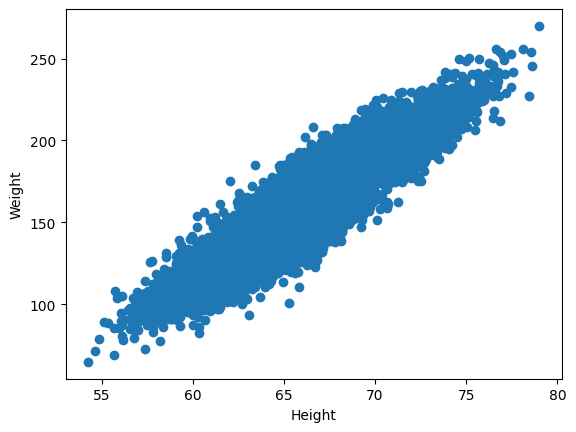

In [36]:
plt.scatter(df["Height"],df["Weight"])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [37]:
#1 = Male
#0 = Female

In [38]:
df["Gender"] = np.where(df["Gender"].str.contains('Female'),0,1)

In [40]:
df["Gender"].value_counts()

Gender
1    5000
0    5000
Name: count, dtype: int64

In [41]:
df.head(10)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
5,1,67.253016,152.212156
6,1,68.785081,183.927889
7,1,68.348516,167.971110
8,1,67.018950,175.929440
9,1,63.456494,156.399676


In [42]:
df.tail(10)

,Gender,Height,Weight
9990,0,63.179498,141.266100
9991,0,62.636675,102.853563
9992,0,62.077832,138.691680
9993,0,60.030434,97.687432
9994,0,59.098250,110.529686
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461
9999,0,61.944246,113.649103


In [43]:
df["Gender"] = df["Gender"].astype(float)

In [44]:
df.info

<bound method DataFrame.info of       Gender     Height      Weight
0        1.0  73.847017  241.893563
1        1.0  68.781904  162.310473
2        1.0  74.110105  212.740856
3        1.0  71.730978  220.042470
4        1.0  69.881796  206.349801
...      ...        ...         ...
9995     0.0  66.172652  136.777454
9996     0.0  67.067155  170.867906
9997     0.0  63.867992  128.475319
9998     0.0  69.034243  163.852461
9999     0.0  61.944246  113.649103

[10000 rows x 3 columns]>

In [45]:
df.describe()

,Gender,Height,Weight
count,10000.000000,10000.000000,10000.000000
mean,0.500000,66.367560,161.440357
std,0.500025,3.847528,32.108439
min,0.000000,54.263133,64.700127
25%,0.000000,63.505620,135.818051
50%,0.500000,66.318070,161.212928
75%,1.000000,69.174262,187.169525
max,1.000000,78.998742,269.989699


In [47]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [49]:
df.info

<bound method DataFrame.info of       Gender     Height      Weight
0        1.0  73.847017  241.893563
1        1.0  68.781904  162.310473
2        1.0  74.110105  212.740856
3        1.0  71.730978  220.042470
4        1.0  69.881796  206.349801
...      ...        ...         ...
9995     0.0  66.172652  136.777454
9996     0.0  67.067155  170.867906
9997     0.0  63.867992  128.475319
9998     0.0  69.034243  163.852461
9999     0.0  61.944246  113.649103

[10000 rows x 3 columns]>

In [50]:
df["Gender"].value_counts()

Gender
1.0    5000
0.0    5000
Name: count, dtype: int64

In [51]:
df["Gender"] = df["Gender"].astype(float)

In [53]:
df.dtypes

Gender    float64
Height    float64
Weight    float64
dtype: object

In [54]:
X = df[["Height","Weight"]]
y = df["Gender"]

In [55]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [74]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [76]:
model.fit(X_train,y_train)

LogisticRegression()

In [77]:
y_pred = model.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score

In [83]:
accuracy = accuracy_score(y_test,y_pred)

In [84]:
accuracy

0.9245